<a id='top'></a>

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# %matplotlib nbagg 
%matplotlib notebook
# %matplotlib inline



## Third party 
import numpy as np
import os, time, zarr, sys
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

import unslice.IO as io
from unslice.utils import *
from unslice.registration.featmatch import *
from unslice.registration.transform import *
from unslice.registration.rigid import *
from unslice.registration.gpu_transform import *
from unslice.registration.utils import *
from unslice.segmentation import *
from unslice.tracing.pyoof import OOF, apply_oof_v2
from unslice.tracing.skel import *
from unslice.flatten import *
from unslice.lightsheetcorrect import *




In [2]:
# Parameters that are constant throughout notebook
working_dir = '/mnt/share3/webster/mEhmAD_2-3'

def bdir(fname):
    return os.path.join(working_dir, fname)

# prefix to add to the beginning of each filename 
name_prefix = '3-lec' # fixed files 
name_prefix2 = '2-lec' 

### Bottom of 3 (fixed) goes with top of 2 (moving)

# Table of contents

### Pre-processing
[1. Convert to zarr](#convert)<br>

### Surface flattening 
[9. Load in manual annotations](#flatten)<br>
[11. UV map](#uvmap)<br>
[12. Rigid align UV maps](#uvuvalign)<br>
[13. Flatten warp](#flattenwarp)<br>
[14. Flatten warp anchor points, detected points](#pointflatten)<br>


### Transformation
[14. Rigid transformation based on manual anchor points](#rigidanchor)<br>
[15. TPS transformation based on manual anchor points (round 0)](#anchorwarp)<br>

# Convert to zarr
<a id='convert'></a>

[Return to top](#top)

In [5]:
# Parameters for converting to zarr

# 2
slab_path = '/mnt/cephfs/general/webster/mEhmAD/2-lec_filtered_tiffs_4xdownsampled'
slab_zarr_path = bdir(name_prefix2+'.zarr')
pc2_img_size = (16400//4,7816//4,5376//4) #(16400,7816,5376)


## Optional parameters 
load_num_slices = 40 # should be smaller than z chunk size, default None 
resample_num_slices = 1 # number of slices to be processed in one go for resampling, default 1
resample_factor = (1,1) # original is (306nm x 433 x 306) --> 4x --> (1) 1.224 x 1.732 x 1.224 um 
chunks = (200,200,200) 
num_workers = 20 
file_names = 'img_[0-9]{4}.tiff' # default 'img_[0-9]{4}.tiff'

## crop
zrange = None
xrange = None
yrange = None

## rotate
lateral_rotate_angle = None # default None

## flip
flip = (0,0,0) # default (0,0,0)


#############
start = time.time()
utils.convert_to_zarr_v2(slab_path, slab_zarr_path, pc2_img_size, load_num_slices=load_num_slices,
                        resample_num_slices=resample_num_slices, file_names=file_names, 
                        chunks=chunks, num_workers=num_workers, lateral_rotate_angle=lateral_rotate_angle,
                        flip=flip, crop_xcoords=xrange, crop_ycoords=yrange, crop_zcoords=zrange,
                        resample_factor=resample_factor)
print(time.time()-start, 'seconds elapsed')

Processing chunk x:0-4100, y:0-1954, z:0-40


100%|██████████| 40/40 [00:02<00:00, 14.89it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 210/210 [00:04<00:00, 51.37it/s]

Processing chunk x:0-4100, y:0-1954, z:40-80



100%|██████████| 40/40 [00:02<00:00, 16.15it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 210/210 [00:11<00:00, 18.93it/s]


Processing chunk x:0-4100, y:0-1954, z:80-120


100%|██████████| 40/40 [00:02<00:00,  5.40it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 210/210 [00:13<00:00, 15.75it/s]

Processing chunk x:0-4100, y:0-1954, z:120-160



100%|██████████| 40/40 [00:02<00:00, 14.49it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 210/210 [00:17<00:00, 12.00it/s]

Processing chunk x:0-4100, y:0-1954, z:160-200



100%|██████████| 40/40 [00:03<00:00, 13.19it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:22<00:00,  9.21it/s]

Processing chunk x:0-4100, y:0-1954, z:200-240



100%|██████████| 40/40 [00:03<00:00, 12.30it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:03<00:00, 60.72it/s]


Processing chunk x:0-4100, y:0-1954, z:240-280


100%|██████████| 40/40 [00:03<00:00, 12.09it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:07<00:00, 26.38it/s]

Processing chunk x:0-4100, y:0-1954, z:280-320



100%|██████████| 40/40 [00:03<00:00, 13.09it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:12<00:00, 17.13it/s]


Processing chunk x:0-4100, y:0-1954, z:320-360


100%|██████████| 40/40 [00:03<00:00, 11.85it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:18<00:00, 11.14it/s]

Processing chunk x:0-4100, y:0-1954, z:360-400



100%|██████████| 40/40 [00:02<00:00, 13.71it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:23<00:00,  9.03it/s]

Processing chunk x:0-4100, y:0-1954, z:400-440



100%|██████████| 40/40 [00:03<00:00, 12.00it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:03<00:00, 61.41it/s]

Processing chunk x:0-4100, y:0-1954, z:440-480



100%|██████████| 40/40 [00:03<00:00, 12.05it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:07<00:00, 26.97it/s]

Processing chunk x:0-4100, y:0-1954, z:480-520



100%|██████████| 40/40 [00:03<00:00, 12.63it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:11<00:00, 18.70it/s]

Processing chunk x:0-4100, y:0-1954, z:520-560



100%|██████████| 40/40 [00:02<00:00, 14.09it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:17<00:00, 11.97it/s]

Processing chunk x:0-4100, y:0-1954, z:560-600



100%|██████████| 40/40 [00:02<00:00, 13.52it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:22<00:00,  9.29it/s]

Processing chunk x:0-4100, y:0-1954, z:600-640



100%|██████████| 40/40 [00:03<00:00, 12.96it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 210/210 [00:03<00:00, 60.59it/s]


Processing chunk x:0-4100, y:0-1954, z:640-680


100%|██████████| 40/40 [00:03<00:00, 12.69it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:07<00:00, 27.42it/s]


Processing chunk x:0-4100, y:0-1954, z:680-720


100%|██████████| 40/40 [00:03<00:00, 12.49it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 210/210 [00:11<00:00, 18.13it/s]

Processing chunk x:0-4100, y:0-1954, z:720-760



100%|██████████| 40/40 [00:03<00:00, 12.63it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 210/210 [00:17<00:00, 12.35it/s]

Processing chunk x:0-4100, y:0-1954, z:760-800



100%|██████████| 40/40 [00:03<00:00, 11.28it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 210/210 [00:22<00:00,  9.31it/s]

Processing chunk x:0-4100, y:0-1954, z:800-840



100%|██████████| 40/40 [00:02<00:00, 13.67it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:03<00:00, 59.35it/s]


Processing chunk x:0-4100, y:0-1954, z:840-880


100%|██████████| 40/40 [00:02<00:00, 13.73it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:07<00:00, 27.12it/s]

Processing chunk x:0-4100, y:0-1954, z:880-920



100%|██████████| 40/40 [00:02<00:00, 13.85it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:11<00:00, 18.50it/s]


Processing chunk x:0-4100, y:0-1954, z:920-960


100%|██████████| 40/40 [00:02<00:00, 13.88it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 210/210 [00:17<00:00, 12.07it/s]

Processing chunk x:0-4100, y:0-1954, z:960-1000



100%|██████████| 40/40 [00:03<00:00, 12.91it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:21<00:00,  9.61it/s]

Processing chunk x:0-4100, y:0-1954, z:1000-1040



100%|██████████| 40/40 [00:03<00:00, 13.25it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:03<00:00, 57.06it/s]


Processing chunk x:0-4100, y:0-1954, z:1040-1080


100%|██████████| 40/40 [00:03<00:00, 12.00it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 210/210 [00:07<00:00, 26.51it/s]


Processing chunk x:0-4100, y:0-1954, z:1080-1120


100%|██████████| 40/40 [00:03<00:00, 11.76it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 210/210 [00:11<00:00, 17.86it/s]


Processing chunk x:0-4100, y:0-1954, z:1120-1160


100%|██████████| 40/40 [00:03<00:00, 12.96it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:17<00:00, 11.84it/s]

Processing chunk x:0-4100, y:0-1954, z:1160-1200



100%|██████████| 40/40 [00:03<00:00, 12.38it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:22<00:00,  9.40it/s]

Processing chunk x:0-4100, y:0-1954, z:1200-1240



100%|██████████| 40/40 [00:03<00:00, 11.75it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 210/210 [00:03<00:00, 64.24it/s]

Processing chunk x:0-4100, y:0-1954, z:1240-1280



100%|██████████| 40/40 [00:02<00:00, 13.93it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 210/210 [00:07<00:00, 29.09it/s]


Processing chunk x:0-4100, y:0-1954, z:1280-1320


100%|██████████| 40/40 [00:02<00:00, 15.56it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:11<00:00, 18.57it/s]

Processing chunk x:0-4100, y:0-1954, z:1320-1344



100%|██████████| 24/24 [00:01<00:00, 14.68it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 210/210 [00:13<00:00, 15.30it/s]


542.3797657489777 seconds elapsed


In [3]:
# Parameters for converting to zarr

# 2
slab_path = '/mnt/cephfs/general/webster/mEhmAD/2-lec_filtered_tiffs_4xdownsampled'
slab_zarr_path = bdir(name_prefix2+'_4xdownsampled.zarr')
pc2_img_size = (16400//4,7816//4,5376//4) #(16400,7816,5376)


## Optional parameters 
load_num_slices = 40 # should be smaller than z chunk size, default None 
resample_num_slices = 1 # number of slices to be processed in one go for resampling, default 1
resample_factor = (.25,.25) # original is (306nm x 433 x 306) --> 4x --> (1) 1.224 x 1.732 x 1.224 um 
chunks = (200,200,200) 
num_workers = 20 
file_names = 'img_[0-9]{4}.tiff' # default 'img_[0-9]{4}.tiff'

## crop
zrange = None
xrange = None
yrange = None

## rotate
lateral_rotate_angle = None # default None

## flip
flip = (0,0,0) # default (0,0,0)


#############
start = time.time()
utils.convert_to_zarr_v2(slab_path, slab_zarr_path, pc2_img_size, load_num_slices=load_num_slices,
                        resample_num_slices=resample_num_slices, file_names=file_names, 
                        chunks=chunks, num_workers=num_workers, lateral_rotate_angle=lateral_rotate_angle,
                        flip=flip, crop_xcoords=xrange, crop_ycoords=yrange, crop_zcoords=zrange,
                        resample_factor=resample_factor)
print(time.time()-start, 'seconds elapsed')

Processing chunk x:0-4100, y:0-1954, z:0-40


100%|██████████| 40/40 [00:01<00:00, 20.72it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 18/18 [00:00<00:00, 79.69it/s]

Processing chunk x:0-4100, y:0-1954, z:40-80



100%|██████████| 40/40 [00:01<00:00, 21.80it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 18/18 [00:00<00:00, 22.84it/s]

Processing chunk x:0-4100, y:0-1954, z:80-120



100%|██████████| 40/40 [00:01<00:00, 20.29it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:01<00:00, 17.76it/s]

Processing chunk x:0-4100, y:0-1954, z:120-160



100%|██████████| 40/40 [00:02<00:00, 17.31it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:01<00:00, 14.56it/s]

Processing chunk x:0-4100, y:0-1954, z:160-200



100%|██████████| 40/40 [00:02<00:00, 16.70it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:01<00:00, 12.41it/s]

Processing chunk x:0-4100, y:0-1954, z:200-240



100%|██████████| 40/40 [00:02<00:00, 16.11it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:00<00:00, 71.06it/s]

Processing chunk x:0-4100, y:0-1954, z:240-280



100%|██████████| 40/40 [00:02<00:00, 16.31it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:00<00:00, 26.77it/s]

Processing chunk x:0-4100, y:0-1954, z:280-320



100%|██████████| 40/40 [00:02<00:00, 16.36it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 18/18 [00:01<00:00, 16.65it/s]

Processing chunk x:0-4100, y:0-1954, z:320-360



100%|██████████| 40/40 [00:02<00:00, 16.33it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:01<00:00, 14.66it/s]

Processing chunk x:0-4100, y:0-1954, z:360-400



100%|██████████| 40/40 [00:02<00:00, 16.31it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:01<00:00, 11.07it/s]

Processing chunk x:0-4100, y:0-1954, z:400-440



100%|██████████| 40/40 [00:02<00:00, 16.42it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:00<00:00, 71.29it/s]

Processing chunk x:0-4100, y:0-1954, z:440-480



100%|██████████| 40/40 [00:02<00:00,  6.88it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 18/18 [00:00<00:00, 29.02it/s]

Processing chunk x:0-4100, y:0-1954, z:480-520



100%|██████████| 40/40 [00:02<00:00, 16.09it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:01<00:00, 17.71it/s]

Processing chunk x:0-4100, y:0-1954, z:520-560



100%|██████████| 40/40 [00:02<00:00, 16.17it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:01<00:00, 15.57it/s]

Processing chunk x:0-4100, y:0-1954, z:560-600



100%|██████████| 40/40 [00:02<00:00, 15.96it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 18/18 [00:01<00:00,  9.55it/s]

Processing chunk x:0-4100, y:0-1954, z:600-640



100%|██████████| 40/40 [00:02<00:00, 15.93it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 18/18 [00:00<00:00, 70.50it/s]

Processing chunk x:0-4100, y:0-1954, z:640-680



100%|██████████| 40/40 [00:02<00:00, 15.81it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:00<00:00, 18.36it/s]

Processing chunk x:0-4100, y:0-1954, z:680-720



100%|██████████| 40/40 [00:02<00:00, 15.79it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 18/18 [00:01<00:00, 17.19it/s]

Processing chunk x:0-4100, y:0-1954, z:720-760



100%|██████████| 40/40 [00:02<00:00,  3.69it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:01<00:00, 15.16it/s]

Processing chunk x:0-4100, y:0-1954, z:760-800



100%|██████████| 40/40 [00:02<00:00, 15.49it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:01<00:00, 10.32it/s]

Processing chunk x:0-4100, y:0-1954, z:800-840



100%|██████████| 40/40 [00:02<00:00,  1.82it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 18/18 [00:00<00:00, 70.96it/s]

Processing chunk x:0-4100, y:0-1954, z:840-880



100%|██████████| 40/40 [00:02<00:00, 16.40it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 18/18 [00:00<00:00, 29.51it/s]

Processing chunk x:0-4100, y:0-1954, z:880-920



100%|██████████| 40/40 [00:02<00:00, 15.69it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 18/18 [00:01<00:00, 17.83it/s]


Processing chunk x:0-4100, y:0-1954, z:920-960


100%|██████████| 40/40 [00:02<00:00, 15.63it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:01<00:00, 14.70it/s]

Processing chunk x:0-4100, y:0-1954, z:960-1000



100%|██████████| 40/40 [00:02<00:00, 15.80it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:01<00:00, 12.17it/s]


Processing chunk x:0-4100, y:0-1954, z:1000-1040


100%|██████████| 40/40 [00:02<00:00, 15.80it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:00<00:00, 71.32it/s]

Processing chunk x:0-4100, y:0-1954, z:1040-1080



100%|██████████| 40/40 [00:02<00:00, 16.00it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:00<00:00, 24.78it/s]

Processing chunk x:0-4100, y:0-1954, z:1080-1120



100%|██████████| 40/40 [00:02<00:00, 15.41it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:01<00:00, 17.09it/s]

Processing chunk x:0-4100, y:0-1954, z:1120-1160



100%|██████████| 40/40 [00:02<00:00, 16.28it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:01<00:00, 15.40it/s]

Processing chunk x:0-4100, y:0-1954, z:1160-1200



100%|██████████| 40/40 [00:02<00:00, 16.77it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 18/18 [00:01<00:00,  9.81it/s]

Processing chunk x:0-4100, y:0-1954, z:1200-1240



100%|██████████| 40/40 [00:02<00:00, 17.59it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:00<00:00, 74.62it/s]

Processing chunk x:0-4100, y:0-1954, z:1240-1280



100%|██████████| 40/40 [00:02<00:00, 18.91it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 18/18 [00:00<00:00, 31.59it/s]

Processing chunk x:0-4100, y:0-1954, z:1280-1320



100%|██████████| 40/40 [00:01<00:00, 20.58it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 18/18 [00:00<00:00, 21.65it/s]

Processing chunk x:0-4100, y:0-1954, z:1320-1344



100%|██████████| 24/24 [00:01<00:00, 18.19it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 18/18 [00:01<00:00, 17.20it/s]

129.37878584861755 seconds elapsed


In [4]:
z = zarr.open(slab_zarr_path,mode='r')
io.writeData(slab_zarr_path[:-5]+'.tif', z[:])

'/mnt/share3/webster/mEhmAD_2-3/2-lec_4xdownsampled.tif'

# Surface flattening

[Return to top](#top)

<a id='flatten'></a>

### Load in manually labelled surface points

### 2

In [4]:
# Top

anchors_json_path = bdir('manual_labels/2-lec_surface_label.json')
annotation_names = ['top_surface']
resample_factor = (0.25,)*3 # multiply this by the anchor points to get to correct reference frame 
offset = (0,0,0) # subtract these to get the actual reference frame (subtracted pre-resampling)
surf_eps_save_path = bdir(name_prefix2+'_thinsurface_top_endpts.npy') # where to save surface points 

# ranges for filtering (not downsampled)
xrange = None
yrange = None
zrange = None



##############################
pts = np.zeros((0,3),dtype='float')
for annotation_name in annotation_names:
    pts_temp = read_annotations_json(anchors_json_path, annotation_name, sink_path=None)
    pts = np.concatenate((pts,pts_temp),axis=0)

if xrange is not None:
    pts = pts[(pts[:,0]>=xrange[0]) * (pts[:,0]<xrange[1])]
if yrange is not None:
    pts = pts[(pts[:,1]>=yrange[0]) * (pts[:,1]<yrange[1])]
if zrange is not None:
    pts = pts[(pts[:,2]>=zrange[0]) * (pts[:,2]<zrange[1])]

pts[:,0] -= offset[0]; pts[:,1] -= offset[1]; pts[:,2] -= offset[2]
pts[:,0] *= resample_factor[0]; pts[:,1] *= resample_factor[1]; pts[:,2] *= resample_factor[2]
pts = np.round(pts).astype('int')

np.save(surf_eps_save_path, pts)
print(pts.shape)

(244, 3)


In [5]:
# Bottom

anchors_json_path = bdir('manual_labels/2-lec_surface_label.json')
annotation_names = ['bot_surface']
resample_factor = (0.25,)*3 # multiply this by the anchor points to get to correct reference frame 
offset = (0,0,0) # subtract these to get the actual reference frame (subtracted pre-resampling)
surf_eps_save_path = bdir(name_prefix2+'_thinsurface_bottom_endpts.npy') # where to save surface points 

# ranges for filtering (not downsampled)
xrange = None
yrange = None
zrange = None



##############################
pts = np.zeros((0,3),dtype='float')
for annotation_name in annotation_names:
    pts_temp = read_annotations_json(anchors_json_path, annotation_name, sink_path=None)
    pts = np.concatenate((pts,pts_temp),axis=0)

if xrange is not None:
    pts = pts[(pts[:,0]>=xrange[0]) * (pts[:,0]<xrange[1])]
if yrange is not None:
    pts = pts[(pts[:,1]>=yrange[0]) * (pts[:,1]<yrange[1])]
if zrange is not None:
    pts = pts[(pts[:,2]>=zrange[0]) * (pts[:,2]<zrange[1])]

pts[:,0] -= offset[0]; pts[:,1] -= offset[1]; pts[:,2] -= offset[2]
pts[:,0] *= resample_factor[0]; pts[:,1] *= resample_factor[1]; pts[:,2] *= resample_factor[2]
pts = np.round(pts).astype('int')

np.save(surf_eps_save_path, pts)
print(pts.shape)

(368, 3)


## UV map surfaces

In this case we start with manually identified surface points

[Return to top](#top)

<a id='uvmap'></a>

## 2

<IPython.core.display.Javascript object>


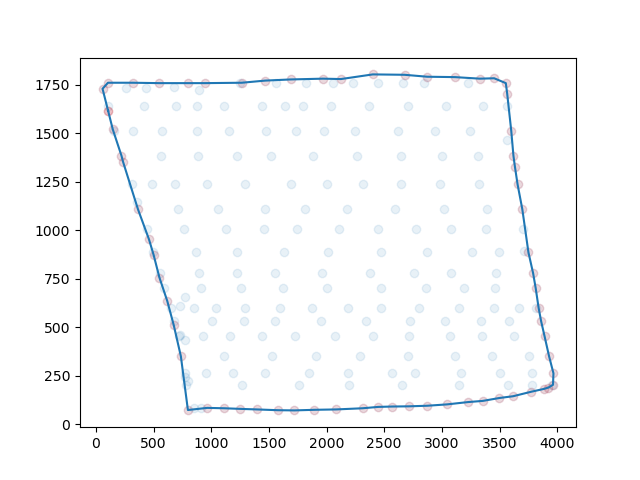

420it [00:00, 24044.33it/s]


<IPython.core.display.Javascript object>


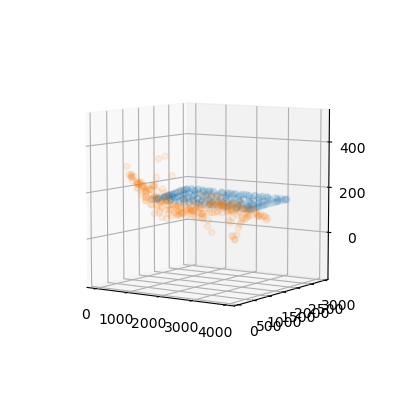

<IPython.core.display.Javascript object>


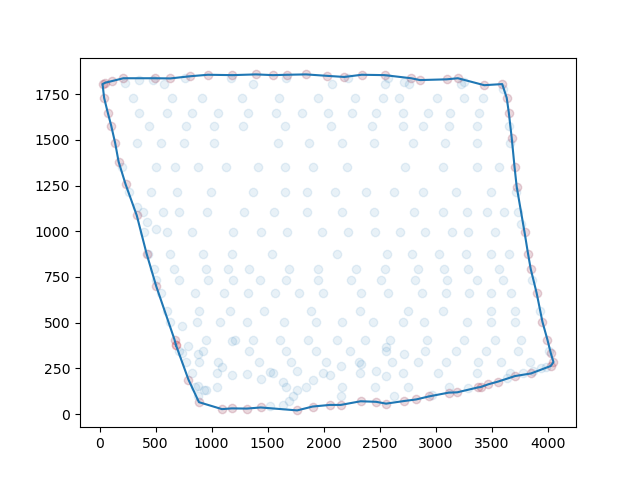

662it [00:00, 26289.85it/s]


<IPython.core.display.Javascript object>


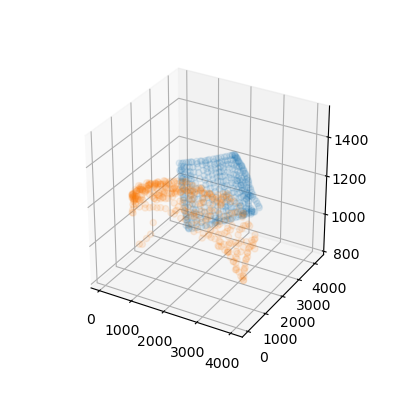

In [6]:
# Top surface 
surf_eps_path = bdir(name_prefix2+'_thinsurface_top_endpts.npy')
zcoord = None # the z coordinate at which we want the UV map to reside. If none, then will self calculate

# Bottom surface
surf_eps_path2 = bdir(name_prefix2+'_thinsurface_bottom_endpts.npy')
zcoord2 = None 

plot = True
alpha = 1e-3 # Parameter for producing a concave mesh. Higher alpha --> more concave

####################################
surf_eps_uv_path = surf_eps_path[:-4]+'_uv.npy'
surf_eps_uv_path2 = surf_eps_path2[:-4]+'_uv.npy'

eps_uv = flatten(surf_eps_path, surf_eps_uv_path, zcoord=zcoord, plot=plot, alpha=alpha)
eps_uv2 = flatten(surf_eps_path2, surf_eps_uv_path2, zcoord=zcoord2, plot=plot, alpha=alpha)

## Interpolate to get smooth surfaces for filtering automated endpoint detection

In [7]:
b = zarr.open(bdir(name_prefix2+'.zarr'))
print(b.shape)

(4100, 1954, 1344)


### Top 2

<IPython.core.display.Javascript object>


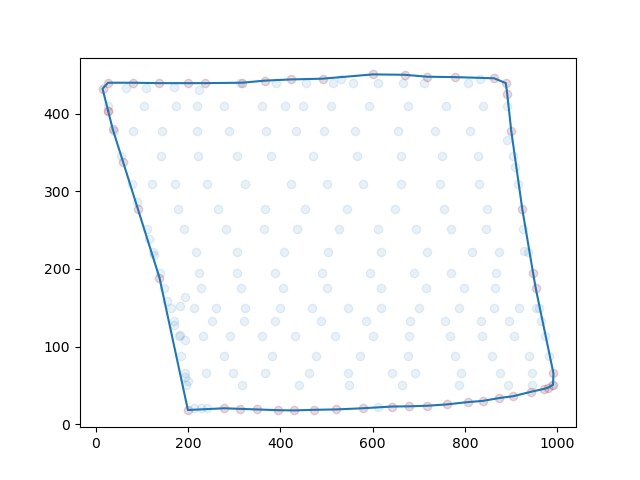

In [8]:
create_surface = True # if we should run this cell 


num_pts = 10000 # for interpolation 
alpha = 1e-3
surf_eps_path = bdir(name_prefix2+'_thinsurface_top_endpts.npy')
mesh_path = surf_eps_path[:-4]+'_mesh.obj' # Default None if we don't wnat to do interpolation 
img_size = (4100, 1954, 1344)
downsample_factor = (0.25,0.25,1)

img_save_path = bdir(name_prefix2+'_thinsurface_top_4xdownsampled.tif')

add_z_slices = 10 # num z slices to add to the thinsurface for detection of surface endpoints
orientation = 'top' # if 'top', then the surface is closer to z=0, if 'bottom', then the surface is closer to z=zshape

################
surf_eps = np.load(surf_eps_path)
if create_surface:
    img,new_pts = filter_manual_surface_points(surf_eps, img_size, downsample_factor=downsample_factor, mesh_path=mesh_path, 
                                 num_pts=num_pts, alpha=alpha)
    io.writeData(img_save_path,img)
    
    # if add surface
    if add_z_slices is not None:
        surf_img = img.copy()
        img_temp = img.copy()
        for z_ in range(1,1+add_z_slices):
            if orientation == 'top':
                img_temp = np.concatenate((np.zeros((*img.shape[:2],1),dtype=img_temp.dtype),img_temp[:,:,:-1]), axis=2)
            else:
                img_temp = np.concatenate((img_temp[:,:,1:],np.zeros((*img.shape[:2],1),dtype=img_temp.dtype)), axis=2)
            surf_img += img_temp
        io.writeData(img_save_path[:-4]+'_zadd.tif',surf_img)
        zarrr = zarr.create(store=zarr.DirectoryStore(img_save_path[:-4]+'_zadd.zarr'), shape=surf_img.shape, chunks=(200,)*3,dtype='uint8',overwrite=True)
        zarrr[:] = surf_img 

## Align the UV maps rigidly to image  

[Return to top](#top)

<a id='uvuvalign'></a>

### 2

In [9]:
# old flattened and non-flattened paths
top_eps_path = bdir(name_prefix2+'_thinsurface_top_endpts.npy')
top_eps_uv_path = bdir(name_prefix2+'_thinsurface_top_endpts_uv.npy')
bot_eps_path = bdir(name_prefix2+'_thinsurface_bottom_endpts.npy')
bot_eps_uv_path = bdir(name_prefix2+'_thinsurface_bottom_endpts_uv.npy')

# new flattened and non-flattened paths, after filtering, UV-UV aligning, and surface-UV aligning 
top_eps_path2 = bdir(name_prefix2+'_thinsurface_top_endpts_new.npy')
top_eps_uv_path2 = bdir(name_prefix2+'_thinsurface_top_endpts_uv_new.npy')
bot_eps_path2 = bdir(name_prefix2+'_thinsurface_bottom_endpts_new.npy')
bot_eps_uv_path2 = bdir(name_prefix2+'_thinsurface_bottom_endpts_uv_new.npy')


Mean thickness: 1059.3049180327869
Mean thickness: 1060.1059782608695
New mean thickness: 1059.3049180327869


<IPython.core.display.Javascript object>


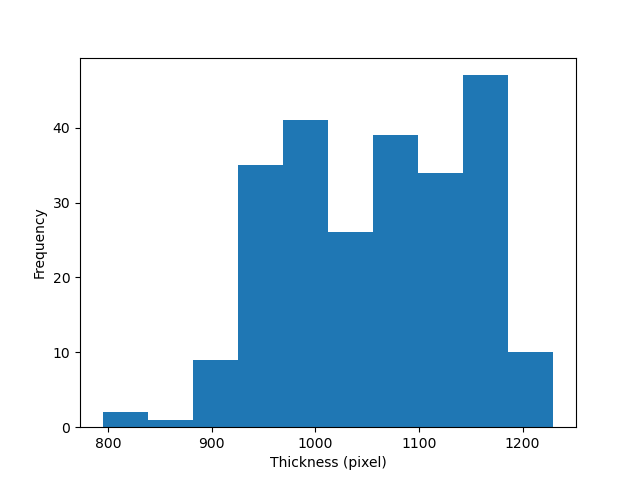

<IPython.core.display.Javascript object>


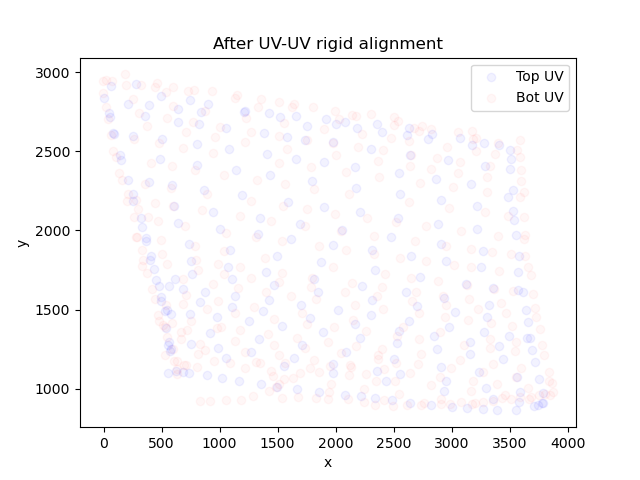

<IPython.core.display.Javascript object>


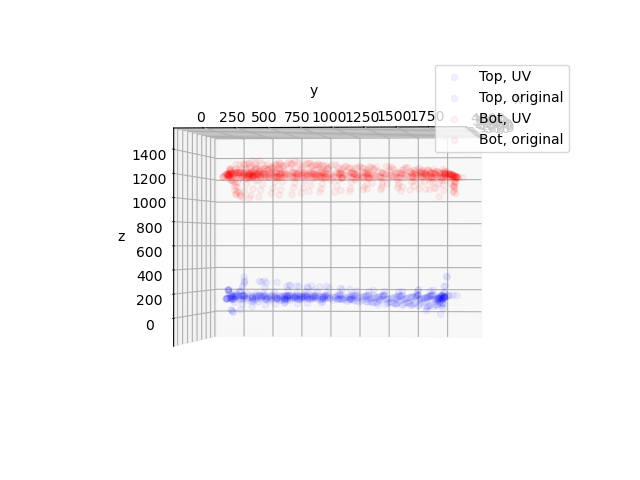

Number of top surface points:244
Number of bottom surface points:368


In [10]:
# Params 
thickness_filter = False
nns = 10
n_std = 2 # num std. devs away from mean thickness to remove
plot = True 


#############
bot_eps = np.load(bot_eps_path)
bot_eps_uv = np.load(bot_eps_uv_path)
top_eps = np.load(top_eps_path)
top_eps_uv = np.load(top_eps_uv_path)

top_eps_flat, top_eps_uv, bot_eps_flat, bot_eps_uv = align_uv_maps(top_eps, top_eps_uv, bot_eps, bot_eps_uv,
                                                                   thickness_filter=thickness_filter, nns=nns, n_std=n_std, plot=plot)

np.save(bot_eps_path2, bot_eps_flat)
np.save(bot_eps_uv_path2, bot_eps_uv)
np.save(top_eps_path2, top_eps_flat)
np.save(top_eps_uv_path2, top_eps_uv)

print("Number of top surface points:%d"%top_eps_flat.shape[0])
print("Number of bottom surface points:%d"%bot_eps_flat.shape[0])

## Flatten TPS warp

[Return to top](#top)

<a id='flattenwarp'></a>

### 2

In [3]:
moving_pts_paths = [bdir(name_prefix2+'_thinsurface_top_endpts_new.npy'),
                    bdir(name_prefix2+'_thinsurface_bottom_endpts_new.npy')]
fixed_pts_paths = [bdir(name_prefix2+'_thinsurface_top_endpts_uv_new.npy'),
                   bdir(name_prefix2+'_thinsurface_bottom_endpts_uv_new.npy')]


fixed_zarr_path = bdir(name_prefix2+'.zarr')
moving_zarr_path = bdir(name_prefix2+'.zarr')
warped_zarr_path = bdir(name_prefix2+'_flattened.zarr')

# Parameters for TPS zarr warp
grid_spacing = 3*(16,)
chunks=3*(200,)
nb_workers = 12
save_grid_values_path = bdir('warping_grids/'+name_prefix2+'_grid_flatten.npy')
use_grid_values_path = None#bdir('warping_grids/'+name_prefix+'_grid_flatten.npy')#None

# Parameters that do not need to be changed 
R_path = None
b_path = None
static_pts_paths = None



######################################
TPS_warp(moving_zarr_path, fixed_zarr_path, warped_zarr_path, moving_pts_paths, fixed_pts_paths,
         static_pts_paths=static_pts_paths, R_path=R_path, b_path=b_path,zadd=None,
          grid_spacing=grid_spacing, smooth=2, chunks=chunks,
          nb_workers=nb_workers, padding=2, save_grid_values_path=save_grid_values_path, 
          show_residuals=True, use_grid_values_path=use_grid_values_path)

# Convert zarr to tiff
tiff_path = warped_zarr_path[:-5]+'_tiffs'
convert_zarr_to_tiff(warped_zarr_path, tiff_path, num_workers=24)

(4100, 1954, 1344)
Fitting radial basis function...
Fitting rbf took 0.145421 seconds
Nonrigid ave. distance [pixels]: 0.0022953201572494682
Warping grid...
Warping grid took 157.440418 seconds
Saved grid_values at /mnt/share3/webster/mEhmAD_2-3/warping_grids/2-lec_grid_flatten.npy
Warping image...
Moving image size: 21.5346432 GB


100%|██████████| 1470/1470 [05:37<00:00,  4.35it/s]


Time elapsed: 10.976510 minutes
Loading z 0 - 200


100%|██████████| 200/200 [00:32<00:00,  6.14it/s]


Loading z 200 - 400


100%|██████████| 200/200 [00:31<00:00,  6.38it/s]


Loading z 400 - 600


100%|██████████| 200/200 [00:33<00:00,  5.97it/s]


Loading z 600 - 800


100%|██████████| 200/200 [00:31<00:00,  6.38it/s]


Loading z 800 - 1000


100%|██████████| 200/200 [00:34<00:00,  5.85it/s]


Loading z 1000 - 1200


100%|██████████| 200/200 [00:33<00:00,  6.05it/s]


Loading z 1200 - 1344


100%|██████████| 144/144 [00:24<00:00,  5.92it/s]


## Flatten all the points (manual anchor points)

Transform detected endpoints and anchor points into flattened reference frame <br>

[Return to top](#top)

<a id='pointflatten'>

## Warp the points into flattened frame for 2

In [6]:
anchors_json_path = bdir('manual_labels/2-lec_anchor_pts.json')
annotation_name = 'anchor_pts'
resample_factor = (0.25,)*3 # multiply this by the anchor points to get to correct reference frame 
offset = (0,0,0) # subtract these to get the actual reference frame 
sink_path = bdir('manual_labels/'+name_prefix2+'_anchor_pts.npy')

# Grid path
grid_path = bdir('warping_grids/'+name_prefix2+'_grid_flatten.npy')
warped_zarr_path = bdir(name_prefix2+'_flattened.zarr') # determines shape of transform only
save_json=False
inverse_transform = True 
save_path = bdir('manual_labels/'+name_prefix2+'_anchor_pts_flat.npy')

##############################
flattened_arteries = read_annotations_json(anchors_json_path, annotation_name, sink_path=None)
flattened_arteries[:,0] -= offset[0]; flattened_arteries[:,1] -= offset[1]; flattened_arteries[:,2] -= offset[2]
flattened_arteries = flattened_arteries.astype('float')
flattened_arteries[:,0] *= resample_factor[0]; flattened_arteries[:,1] *= resample_factor[1]; flattened_arteries[:,2] *= resample_factor[2]
# flattened_arteries = np.round(flattened_arteries).astype('int')
np.save(sink_path, flattened_arteries)

coords = grid_transform_pts(grid_path, sink_path, warped_zarr_path, save_path=save_path, save_json=save_json, inverse_transform=inverse_transform)

## Warp the points into flattened, NFHwarped frame for 3

In [7]:
anchors_json_path = bdir('manual_labels/3-lec_anchor_pts.json')
annotation_name = 'anchor_pts'
resample_factor = (0.25,)*3 # multiply this by the anchor points to get to correct reference frame 
offset = (0,0,0) # subtract these to get the actual reference frame 
sink_path = bdir('manual_labels/'+name_prefix+'_anchor_pts.npy')

# Grid path
grid_path ='/mnt/share3/webster/mEhmAD_1-3_real/warping_grids/3-lec_grid_flatten.npy'
warped_zarr_path = '/mnt/share3/webster/mEhmAD_1-3_real/3-lec_flattened.zarr' # determines shape of transform only
save_json=False
inverse_transform = True 
save_path = bdir('manual_labels/'+name_prefix+'_anchor_pts_flat.npy')

##############################
flattened_arteries = read_annotations_json(anchors_json_path, annotation_name, sink_path=None)
flattened_arteries[:,0] -= offset[0]; flattened_arteries[:,1] -= offset[1]; flattened_arteries[:,2] -= offset[2]
flattened_arteries = flattened_arteries.astype('float')
flattened_arteries[:,0] *= resample_factor[0]; flattened_arteries[:,1] *= resample_factor[1]; flattened_arteries[:,2] *= resample_factor[2]
# flattened_arteries = np.round(flattened_arteries).astype('int')
print(flattened_arteries.shape)
np.save(sink_path, flattened_arteries)

coords = grid_transform_pts(grid_path, sink_path, warped_zarr_path, save_path=save_path, save_json=save_json, inverse_transform=inverse_transform)

(255, 3)


In [8]:
grid_path = '/mnt/share3/webster/mEhmAD_1-3_real/warping_grids/grid_anchor_tps_r1.npy'
pts_path = bdir('manual_labels/'+name_prefix+'_anchor_pts_flat.npy')
warped_zarr_path = '/mnt/share3/webster/mEhmAD_1-3_real/3-lec_flattened_anchorwarp_r1.zarr'
save_path = bdir('manual_labels/'+name_prefix+'_anchor_pts_flat_anchorwarp.npy')
save_json = False 
inverse_transform = True  


#####
coords = grid_transform_pts(grid_path, pts_path, warped_zarr_path, save_path=save_path, save_json=save_json, inverse_transform=inverse_transform)

In [9]:
# assume it's always top being warped bottom (i.e. if the cut surface is closer to z=0, we are warping it to the other
# cut surface closer to z = z_shape)

min_z = 50 # coresponds to where the lowest z of keypoint will be
moving_pts_path = bdir('manual_labels/'+name_prefix2+'_anchor_pts_flat.npy')
fixed_pts_path = bdir('manual_labels/'+name_prefix+'_anchor_pts_flat_anchorwarp.npy')

###############
# find max difference in z between matched keypoints
fixed_pts = np.load(fixed_pts_path)
moving_pts = np.load(moving_pts_path)
max_diff = np.max(fixed_pts[:,2]-moving_pts[:,2])
# fixed_pts[:,2] -= max_diff 
if len(np.argwhere(fixed_pts[:,2]-max_diff<min_z))!=0:
    tobeadded = max_diff - np.min(fixed_pts[:,2]-max_diff)
    max_diff -= tobeadded
fixed_pts[:,2] -= max_diff 

np.save(fixed_pts_path[:-4]+'_zminus%d.npy'%max_diff,fixed_pts)
print(max_diff) # we have to transform this later

1850.7637429411711


## Rigid alignment (using manual anchor points)

[Return to top](#top)

<a id='rigidanchor'></a>

(255, 3) (255, 3)
-37.701667109104434


<IPython.core.display.Javascript object>


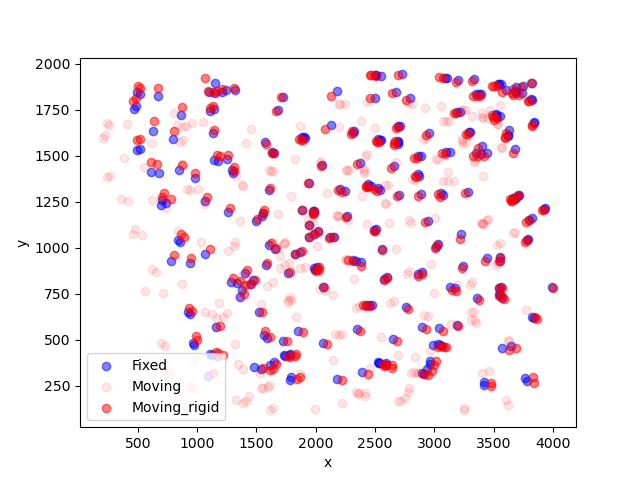

[[ 0.99972981  0.02324452  0.        ]
 [-0.02324452  0.99972981  0.        ]
 [ 0.          0.          1.        ]] [220.84944366 207.19195662 -37.70166711]


In [10]:
# First do rigid alignment again

plot2d = True # if Flase, plot 3d 
use2d = True # don't use 3d, the nonplanar rotation is too sensitive to the endpoint detection
flattened_arteries_paths = [bdir('manual_labels/'+name_prefix+'_anchor_pts_flat_anchorwarp_zminus%d.npy'%max_diff)]
flattened_arteries_paths2 = [bdir('manual_labels/'+name_prefix2+'_anchor_pts_flat.npy')]
make_json = False 


###############################################

flattened_arteries = np.zeros((0,3),dtype='int')
flattened_arteries_2 = np.zeros((0,3),dtype='int')
for i in range(len(flattened_arteries_paths)):
    flattened_arteries = np.concatenate((flattened_arteries,np.load(flattened_arteries_paths[i])),axis=0)
    flattened_arteries_2 = np.concatenate((flattened_arteries_2,np.load(flattened_arteries_paths2[i])),axis=0)

print(flattened_arteries.shape, flattened_arteries_2.shape)
# if doing 2d
if use2d:
    R,b = rigid_transform_3D(np.transpose(flattened_arteries_2[:,:2]), np.transpose(flattened_arteries[:,:2]))
    new_pts = np.transpose(np.matmul(R,np.transpose(flattened_arteries_2[:,:2])) + b)
    new_points = np.concatenate((new_pts,flattened_arteries_2[:,2:3]),axis=1) # add in the z coordinate
    
    # needs to be 3x3 for future transforms
    Rn = np.zeros((3,3))
    Rn[:2,:2] = R
    Rn[2,2] = 1
    bn = np.zeros((3,))
    bn[:2] = b[:,0]
    
    # compute the approximate z translation 
    zadd = np.mean(flattened_arteries[:,2] - flattened_arteries_2[:,2])
    bn[2] = zadd 
    print(zadd)
    R = Rn
    b = bn
    
# 3d
else:
    R,b = rigid_transform_3D(np.transpose(flattened_arteries_2), np.transpose(flattened_arteries))
    new_points = np.transpose(np.matmul(R,np.transpose(flattened_arteries_2)) + b)
    print(b)
    # we don't want to screw with the z coordinate translation
    b[2] = 0

np.save(bdir('R.npy'), R)
np.save(bdir('b.npy'), b.squeeze())

# 2D
fig = plt.figure()

if plot2d:
    ax = fig.add_subplot(1,1,1)#,projection='3d')
    ax.scatter(flattened_arteries[:,0],flattened_arteries[:,1],antialiased=True, alpha=0.5, color='b')
    ax.scatter(flattened_arteries_2[:,0],flattened_arteries_2[:,1],antialiased=True, alpha=0.1, color='r')
    ax.scatter(new_points[:,0],new_points[:,1],antialiased=True,alpha=0.5,color='r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(['Fixed','Moving','Moving_rigid'])

#3d
else:
    ax = fig.add_subplot(1,1,1,projection='3d')
    ax.scatter(flattened_arteries[:,0],flattened_arteries[:,1],flattened_arteries[:,2],antialiased=True, alpha=0.5, color='b')
    ax.scatter(flattened_arteries_2[:,0],flattened_arteries_2[:,1],antialiased=True, alpha=0.1,color='r')
    ax.scatter(new_points[:,0],new_points[:,1],new_points[:,2],antialiased=True,alpha=0.5,color='r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(['Fixed','Moving','Moving_rigid'])
    
if make_json:
    numpy_to_json(flattened_arteries, flattened_arteries_path[:-4]+'.json')
    numpy_to_json(flattened_arteries_2, flattened_arteries_path2[:-4]+'.json')
print(R,b)

## TPS warp based on manual anchor points 

[Return to top](#top)

<a id='anchorwarp'></a>

In [11]:
moving_pts_paths = [bdir('manual_labels/'+name_prefix2+'_anchor_pts_flat.npy')]
fixed_pts_paths =  [bdir('manual_labels/'+name_prefix+'_anchor_pts_flat_anchorwarp_zminus1850.npy')]

fixed_zarr_path = '/mnt/share3/webster/mEhmAD_1-3_real/3-lec_flattened_anchorwarp_r1.zarr'
moving_zarr_path = bdir(name_prefix2+'_flattened.zarr')
warped_zarr_path = bdir(name_prefix2+'_flattened_anchorwarp_r0.zarr')


# Parameters for TPS zarr warp
grid_spacing = 3*(16,)
chunks=3*(200,)
nb_workers = 8 

# affine parameters 
R_path = bdir('R.npy')
b_path = bdir('b.npy')

# grid I/O 
save_grid_values_path = bdir('warping_grids/grid_anchor_tps_r0.npy')
use_grid_values_path = None

# anchor parameters (using the surface on the other side and manually identified anchors on the cut surface)
static_pts_paths = [bdir(name_prefix2+'_thinsurface_bottom_endpts_uv_new.npy')]

##########################

TPS_warp(moving_zarr_path, fixed_zarr_path, warped_zarr_path, moving_pts_paths, fixed_pts_paths,
         static_pts_paths=static_pts_paths, R_path=R_path, b_path=b_path,
          grid_spacing=grid_spacing, smooth=2, chunks=chunks,
          nb_workers=nb_workers, padding=2, save_grid_values_path=save_grid_values_path, 
          show_residuals=True, use_grid_values_path=use_grid_values_path)

# Convert zarr to tiff
tiff_path = warped_zarr_path[:-5]+'_tiffs'
convert_zarr_to_tiff(warped_zarr_path, tiff_path, num_workers=None)

(4525, 2025, 1344)
Fitting radial basis function...
Fitting rbf took 0.164143 seconds
Nonrigid ave. distance [pixels]: 0.003590585738506888
Warping grid...
Warping grid took 182.911404 seconds
Saved grid_values at /mnt/share3/webster/mEhmAD_2-3/warping_grids/grid_anchor_tps_r0.npy
Warping image...
Moving image size: 21.5346432 GB


100%|██████████| 1771/1771 [07:31<00:00,  4.46it/s]


Time elapsed: 13.604690 minutes
Loading z 0 - 200


100%|██████████| 200/200 [01:23<00:00,  2.78it/s]


Loading z 200 - 400


100%|██████████| 200/200 [01:23<00:00,  2.30it/s]


Loading z 400 - 600


100%|██████████| 200/200 [01:24<00:00,  2.47it/s]


Loading z 600 - 800


100%|██████████| 200/200 [01:23<00:00,  2.38it/s]


Loading z 800 - 1000


100%|██████████| 200/200 [01:23<00:00,  2.22it/s]


Loading z 1000 - 1200


100%|██████████| 200/200 [01:23<00:00,  2.41it/s]


Loading z 1200 - 1344


100%|██████████| 144/144 [00:59<00:00,  2.20it/s]


### Warp all of the moving endpoints to the new frame so we can visualize and do next rounds

flat reference frame --> anchor_r0 reference frame (moving)

In [16]:
# Warped zarr path - this only determines the shape of the image to which we're transforming the grid
warped_zarr_path = bdir(name_prefix2+'_flattened_anchorwarp_r0.zarr')

# Manual anchor points, these need to be loaded and added to pts_transform_paths list
anchors_path = bdir('manual_anchor_labels/'+name_prefix2+'_anchor_pts_flat.npy')
anchors_save_path = bdir('manual_anchor_labels/'+name_prefix2+'_anchor_pts_flat_anchorwarp_r0.npy') # path to save the flattened transformed anchors

# Detected endpoints
pts_masked_path = bdir(name_prefix2+'_endpoints_top_masked_flat.npy')
pts_masked_save_path = bdir(name_prefix2+'_endpoints_top_masked_flat_anchorwarp_r0.npy')

# Grid path
grid_path = bdir('warping_grids/grid_anchor_tps_r0.npy')
save_json=False
inverse_transform = True 

##############################
anchor_flat = grid_transform_pts(grid_path, anchors_path, warped_zarr_path,inverse_transform=inverse_transform, 
                                       save_path=anchors_save_path, save_json=save_json)
detected_flat = grid_transform_pts(grid_path, pts_masked_path, warped_zarr_path,inverse_transform=inverse_transform, 
                                         save_path=pts_masked_save_path, save_json=save_json)

### Visualize anchor points to json

In [98]:
# Convert anchor points to json for visualization 
anchor_pts_path = bdir('manual_anchor_labels/'+name_prefix+'_anchor_pts_flat.npy') # this will be the flattened fixed anchor points

#############
anchor_pts = np.load(anchor_pts_path)
numpy_to_json(anchor_pts, anchor_pts_path[:-4]+'.json')

In [99]:
# Convert anchor points to json for visualization 
anchor_pts_path = bdir('manual_anchor_labels/'+name_prefix2+'_anchor_pts_flat_anchorwarp_r0.npy') # this will be the flattened fixed anchor points

#############
anchor_pts = np.load(anchor_pts_path)
numpy_to_json(anchor_pts, anchor_pts_path[:-4]+'.json')